In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

In [2]:
import sklearn.datasets
iris = sklearn.datasets.load_iris()

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
data = iris["data"]
target = iris["target"]
target_names = iris["target_names"] 
var_names = iris["feature_names"]
print(f"var_names : {var_names}")
print(f"target : {np.unique(target)}")
print(f"target_names : {target_names}")

var_names : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target : [0 1 2]
target_names : ['setosa' 'versicolor' 'virginica']


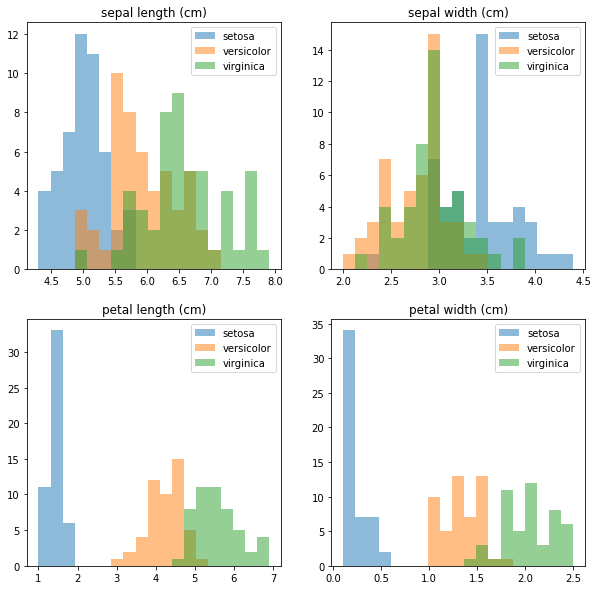

In [5]:
fig = plt.figure(figsize=(10, 10))

# loop on variables
for i in range(4):
    # create subplot
    plt.subplot(2, 2, i+1)
    # select the variable of interest from the data
    values = data[:, i]
    # define histogram binning
    # we use 20 bins between the minimum and maximum values
    bins = np.linspace(np.min(values), np.max(values), 20)
    # loop on categories
    for j in np.unique(target):
        # select values for this category
        category_values = values[target == j]
        # plot histogram
        plt.hist(category_values, bins, alpha=0.5, label=target_names[j])
    plt.title(var_names[i])
    plt.legend()

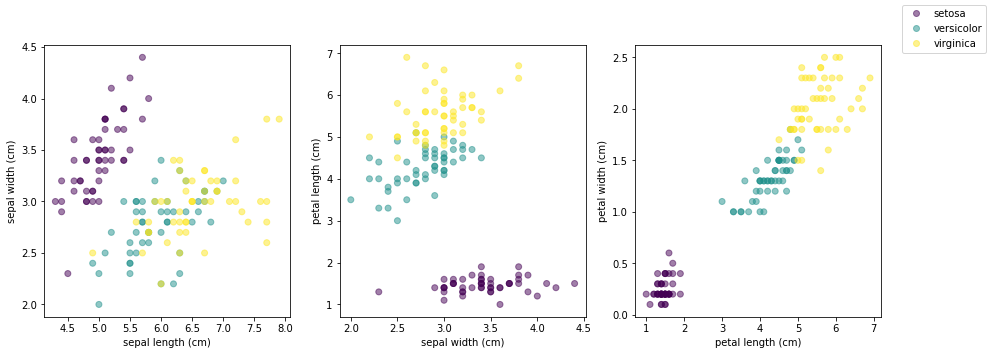

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    j = i+1
    # we plot variable 1 vs 0, then 2 vs 1, then 3 vs 2
    scatter = axes[i].scatter(data[:, i], data[:, j], c=target, alpha=0.5)
    axes[i].set_xlabel(var_names[i])
    axes[i].set_ylabel(var_names[j])
elements = list(scatter.legend_elements())
# by default, the legend labels are the values of the target, 0, 1, 2 so we replace with the target names
elements[1] = target_names
fig.legend(*elements)

In [7]:
df = pd.DataFrame(data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
df["species"] = target

In [8]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


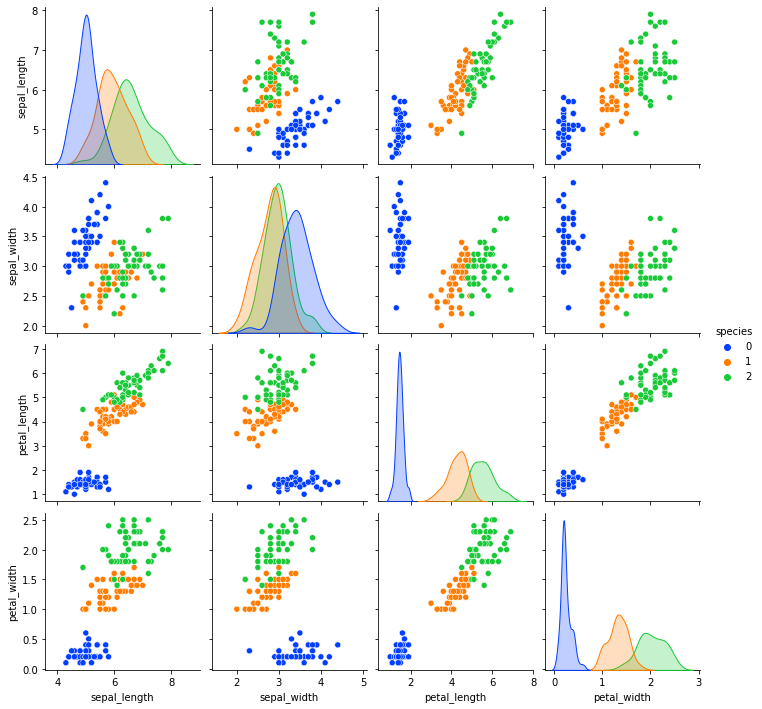

In [9]:
sb.pairplot(df, hue="species", palette="bright")

# Lets try a linear regression on petal length vs petal width

In [10]:
x = np.array(data[:, 2])
y = np.array(data[:, 3])

In [11]:
sumx = x.sum()
sumy = y.sum()
sumx2 = np.sum(x**2)
sumy2 = np.sum(y**2)
sumxy = np.sum(x*y)

In [12]:
xbar = sumx / x.shape[0]
ybar = sumy / y.shape[0]

In [13]:
variancex = sumx2 / x.shape[0] - (xbar**2)
variancey = sumy2 / y.shape[0] - (ybar**2)
covariancexy = sumxy / x.shape[0] - (xbar*ybar)

In [14]:
import math
r = covariancexy / (math.sqrt(variancex) * math.sqrt(variancey))
print(f"coefficient de correlation r = {r}")

coefficient de correlation r = 0.9628654314027966


#### on voit que le coefficient de correlation est très proche de 1, un ajustement affine de y en x est donc pertinent

In [15]:
a = covariancexy / variancex
b = ybar - a * xbar
function = a * x + b

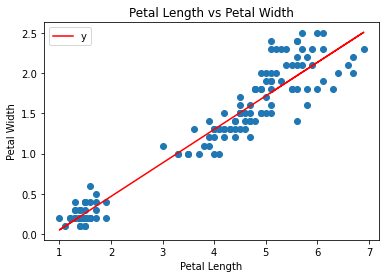

In [16]:
plt.plot(x, function, "-r")
plt.legend("y=ax+b")
plt.scatter(x, y)
plt.title("Petal Length vs Petal Width")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

### With this function, we can predict petal_length thanks to petal_width and vice versa
### Not very useful in our case, but it was interesting